In [58]:
import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Load Dataset

In [2]:
user = pd.read_csv('../DS_Challenges/Funnel_Analysis/user_table.csv')
home = pd.read_csv('../DS_Challenges/Funnel_Analysis/home_page_table.csv')
search = pd.read_csv('../DS_Challenges/Funnel_Analysis/search_page_table.csv')
pay = pd.read_csv('../DS_Challenges/Funnel_Analysis/payment_page_table.csv')
confirm = pd.read_csv('../DS_Challenges/Funnel_Analysis/payment_confirmation_table.csv')

In [3]:
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [4]:
home.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [5]:
search.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [6]:
pay.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [7]:
confirm.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


# Data Processing

In [8]:
# Merge home, search, payment and confirmation
data = home.merge(search,how='left',on='user_id').\
         rename(columns = {'page_x':'home_page','page_y':'search_page'}).\
         merge(pay,how='left',on='user_id').\
         merge(confirm,on = 'user_id',how = 'left').\
         rename(columns = {'page_x':'payment_page','page_y':'payment_confirmation_page'})

In [9]:
# Merge above dataset with user_id
data = user.merge(data,on = 'user_id')

In [10]:
data.head(5)

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [11]:
data['home_page'] = np.where(data['home_page']=='home_page', 1, 0)
data['search_page'] = np.where(data['search_page']=='search_page', 1, 0)
data['payment_page'] = np.where(data['payment_page']=='payment_page', 1, 0)
data['payment_confirmation_page'] = np.where(data['payment_confirmation_page']=='payment_confirmation_page', 1, 0)

In [12]:
data.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation_page
0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   user_id                    90400 non-null  int64 
 1   date                       90400 non-null  object
 2   device                     90400 non-null  object
 3   sex                        90400 non-null  object
 4   home_page                  90400 non-null  int64 
 5   search_page                90400 non-null  int64 
 6   payment_page               90400 non-null  int64 
 7   payment_confirmation_page  90400 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.2+ MB


# Analysis

In [27]:
data['date'] = pd.to_datetime(data['date'])

### Visit Probability for Each Page

In [57]:
conv_ratio = pd.DataFrame(data.mean()*100).rename(columns = {0:'conversion_rate (%)'})[1:]
conv_ratio

,conversion_rate (%)
home_page,100.000000
search_page,50.000000
payment_page,6.670354
payment_confirmation_page,0.500000


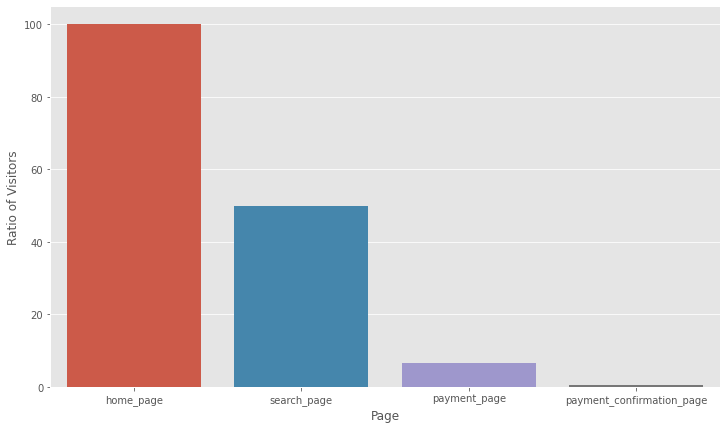

In [82]:
fig, ax = plt.subplots(figsize = (12, 7))
sns.barplot(data = conv_ratio, x = conv_ratio.index, y = 'conversion_rate (%)', ax = ax)
ax.set_xlabel('Page', fontsize=12)
ax.set_ylabel('Ratio of Visitors', fontsize=12)
plt.show()

### Conversion Rate for Each Page

In [80]:
def conversion_rate(df):
    """ function to calculate conversion rate for home, search and payment page. """
    rates = []
    rates.append(df['search_page'].sum()/df['home_page'].sum())
    rates.append(df['payment_page'].sum()/df['search_page'].sum())
    rates.append(df['payment_confirmation_page'].sum()/df['payment_page'].sum())
    return rates

### 1. Overall

In [85]:
rates = conversion_rate(data)
names = ['home', 'search', 'payment']
maps = {'Page':names, 'Conversion Rate':rates}
overall_conv = pd.DataFrame(maps)
overall_conv

,Page,Conversion Rate
0,home,0.500000
1,search,0.133407
2,payment,0.074959


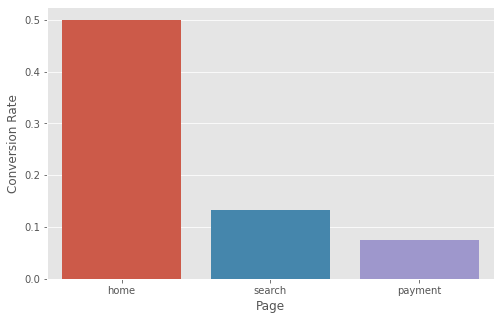

In [86]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=overall_conv, ax=ax)
plt.show()

### 2. Device

Observations:

- The conversion rates of desktop and mobile for homepage are the same.
- However, the conversion rates of desktop for search page and payment page are lower than mobile.

Future steps:

- Therefore, we could contact the product team to find out the reason for this difference. Maybe it's because the UI of desktop is not so attractive. So do the AB test and see whether the result is significant.
- Also, we could tell the marketing team to reach more users who use mobile to review the pages by conducting marketing campaigns or advertising since mobile users' conversion rate is higher.
- Meanwhile, we could also send emails or coupons to those who went to the payment page but didn't confirm payment to raise payment conversion rate.
- In order to raise search page conversion rate, we could focus more on the products that users search frequently and see whether they didn't go to the payment page. To some extent they are interested in those products but they didn't buy for some reasons like prices are too high.

In [87]:
print(data['device'].unique())

['Desktop' 'Mobile']


In [91]:
desk_rates = conversion_rate(data[data['device']=='Desktop'])
mob_rates = conversion_rate(data[data['device']=='Mobile'])
names = ['home', 'search', 'payment']
print('{0:^10s} | {1:^10s} | {2:^10s}'.format('Page', 'Desktop', 'Mobile'))
print('-' * 40)
for name, desk_rate, mob_rate in zip(names, desk_rates, mob_rates):
    print('{0:^10s} | {1:^10f} | {2:^10.6f}'.format(name, desk_rate, mob_rate))

   Page    |  Desktop   |   Mobile  
----------------------------------------
   home    |  0.500000  |  0.500000 
  search   |  0.100000  |  0.200000 
 payment   |  0.049834  |  0.100000 


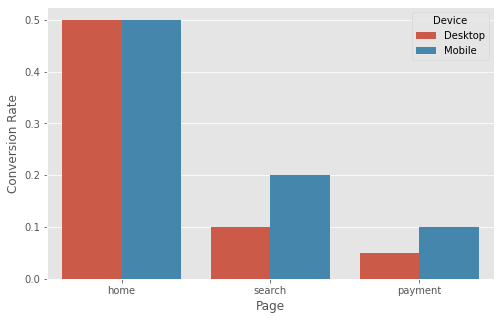

In [95]:
# Visualization
maps = {'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'Device': ['Desktop', 'Desktop', 'Desktop', 'Mobile', 'Mobile', 'Mobile'], 
        'Conversion Rate': desk_rates + mob_rates}
device_conv = pd.DataFrame(maps, columns=['Page', 'Device', 'Conversion Rate'])

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=device_conv, ax=ax, hue='Device')
plt.show()

### 3. Sex

The conversion rates for females and males are almost the same while females' conversion rates are a bit high.

In [96]:
print(data['sex'].unique())

['Female' 'Male']


In [98]:
male_rates = conversion_rate(data[data['sex']=='Male'])
female_rates = conversion_rate(data[data['sex']=='Female'])
names = ['home', 'search', 'payment']
print('{0:^10s} | {1:^10s} | {2:^10s}'.format('Page', 'Male', 'Female'))
print('-' * 40)
for name, male_rate, female_rate in zip(names, male_rates, female_rates):
    print('{0:^10s} | {1:^10f} | {2:^10.6f}'.format(name, male_rate, female_rate))

   Page    |    Male    |   Female  
----------------------------------------
   home    |  0.496944  |  0.503073 
  search   |  0.130083  |  0.136708 
 payment   |  0.072014  |  0.077742 


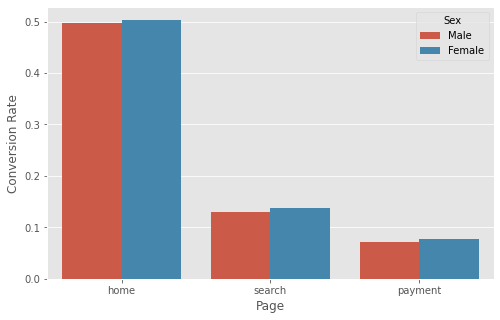

In [99]:
# Visualization
maps = {'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'Sex': ['Male','Male','Male','Female','Female','Female'], 
        'Conversion Rate': male_rates + female_rates}
sex_conv = pd.DataFrame(maps, columns=['Page', 'Sex', 'Conversion Rate'])

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=sex_conv, ax=ax, hue='Sex')
plt.show()